In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from ma_triple import get_data,Strategy
# plt.style.use('seaborn')
df_dict = {}

In [2]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
               'XRP','DYDX','AVAX','LINK','GAS',
               'DOGE','ORDI','TRB','WLD','ADA',
               'OP','FIL','ZRX','LTC','RUNE','ATOM',
               'ARB','GMT','ETC','ARK','BCH','DOT',
               'LDO','SUI','GALA','CAKE',
               'APE','INJ','FTM','APT','YFI','OMG',
               'SEI','EOS','1000SHIB','NEAR',
               'MKR','CYBER','UNI',
               'BLUR','SUSHI','WAVES','MASK','MANA',
               'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')

APY: 139.33 %
MDD: 19.73 %
MDD Duration 119 days 18:45:00
worst trade: -9.72 %
2023-03-20 09:00:00 ~ 2023-03-20 16:15:00
avg holding days: 0.50 days
--------------------------------------------
PF: 2.39
Sharpe Ratio: 2.37
Calmar Ratio: 8.09
Sortino Ratio: 3.95
Omega Ratio: 1.12
--------------------------------------------
Expectancy : 1.25 %
Total Time Exposure : 15.37 %
Total Trades: 83
Win Rate: 40.96 %
--------------------------------------------
PF * Win Rate: 0.981


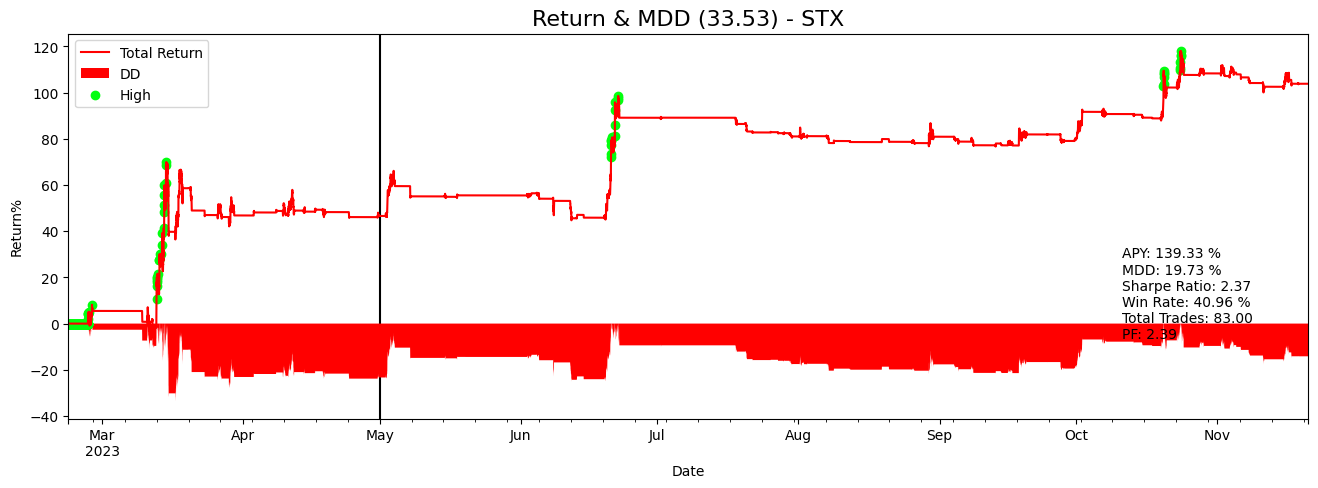

(None,
 Start                               2023-02-21 14:30:00
 End                                 2023-11-21 01:00:00
 Period                                272 days 10:45:00
 Start Value                                     10000.0
 Min Value                                   9695.857015
 Max Value                                  21800.298939
 End Value                                  20383.269552
 Total Return [%]                             103.832696
 Benchmark Return [%]                           3.188406
 Total Time Exposure [%]                       15.373734
 Max Gross Exposure [%]                            100.0
 Max Drawdown [%]                              19.731185
 Max Drawdown Duration                 119 days 18:45:00
 Total Orders                                        166
 Total Fees Paid                              501.170334
 Total Trades                                         83
 Win Rate [%]                                  40.963855
 Best Trade [%]         

In [31]:
start = '2022-01-01'
sep = ''
end = ''

params = {"short_window": 44,
        "middle_window": 44,
        "long_window": 8}

side = 'long'
config = {'freq':'15min', 'lag':1, 'fee': 0.0003,'weekend_filter':False}
coin = 'STX'

# 5m : RUNE{"short_window": 20,"middle_window": 56,"long_window": 32}both
# 5m : RUNE{"short_window": 44,"middle_window": 44,"long_window": 44}long
# 15m : AVAX{"short_window": 44,"middle_window": 44,"long_window": 44}short
# 15m : RUNE{"short_window": 12,"middle_window": 12,"long_window": 18}long


df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

In [21]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-11-20'

symbol_list = ['RUNE']
sample_sets = [[start,end]]
# freq = '1h'

params = {"short_window": [2,40,4],
        "middle_window":[2,40,4],
        "long_window": [2,40,4]}
    
config = {'freq':'1h','fee': 0.0003,'weekend_filter':False}
multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    df_dict=df_dict,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)


======================= RUNE BOTH Optimize Test =======================
Optimization trails: 1000


100%|██████████| 1000/1000 [00:26<00:00, 37.08it/s]


Optimization time: 27.4 sec
---------- RUNE BOTH ----------
{'short_window': 2, 'middle_window': 22, 'long_window': 22}
+------------+-----------+----------+-----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |      毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+-----------+------------+---------+------------|
| 2022-03    |     78.29 | 17074.5  |  -9357.78 |       1.82 |   39.71 |         68 |
| 2022-06    |    145.92 | 26400    | -11808.2  |       2.24 |   37.5  |         72 |
| 2022-09    |     22.36 | 10115.1  |  -7878.76 |       1.28 |   35.9  |         78 |
| 2022-12    |     36.15 |  8912.62 |  -5297.17 |       1.68 |   39.29 |         84 |
| 2023-03    |     32.98 |  8271.68 |  -4973.49 |       1.66 |   32.35 |         68 |
| 2023-06    |     36.04 |  7979.18 |  -4375.65 |       1.82 |   28.95 |         76 |
| 2023-09    |     45.17 | 11708.8  |  -7191.7  |       1.63 |   32.98 |         94 |
| 2023-12    |     25.27 | 10165.9  |